In [2]:
!pip install -qq google-play-scraper
!pip install -qq -U watermark
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

     |████████████████████████████████| 52 kB 1.8 MB/s 
Python implementation: CPython
Python version       : 3.7.12
IPython version      : 5.5.0

pandas             : 1.1.5
matplotlib         : 3.2.2
seaborn            : 0.11.2
google_play_scraper: 1.0.2



In [3]:
app_packages = [
  'com.imdb.mobile',
  'com.instagram.android',
  'com.zhiliaoapp.musically',
  'com.microsoft.teams',
  'com.whatsapp',
  'com.microsoft.todos',
  'com.viber.voip',
  'com.skype.raider',
  'com.microsoft.office.outlook',
  'com.tasks.android',
  'com.yahoo.mobile.client.android.mail',
  'com.linkedin.android',
  'com.hbo.hbonow',
  'com.bitstrips.imoji',
  'com.netflix.mediaclient',
  'com.disney.disneyplus',
  'com.activision.callofduty.shooter'
]

In [4]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 17/17 [00:04<00:00,  3.41it/s]


In [5]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [6]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('appsNTLK.csv', index=None, header=True)

In [7]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

  6%|▌         | 1/17 [00:07<02:06,  7.88s/it]


KeyboardInterrupt: ignored

# New Section

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviewsNLTK.csv', index=None, header=True)

In [ ]:
!nvidia-smi

In [ ]:

import torch

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import normalize

#%%
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

In [ ]:
df.info()
sns.countplot(df.score)
plt.xlabel('review score');

In [15]:
!pip install Unidecode


     |████████████████████████████████| 235 kB 7.4 MB/s 


In [14]:
!pip install nltk

In [16]:
import numpy as np


import matplotlib.pyplot as plt
import tensorflow as tf
import unidecode
import nltk

from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from gensim.parsing.preprocessing import remove_stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [17]:
train_set = df[['content','score']]
train_set.head()
train_set = train_set.replace([2],1)
train_set = train_set.replace([4],5)
train_set

,content,score
0,"Since the latest update, the app has slowed to...",1
1,Unusable. This used to be one of my most used ...,1
2,This app has been performing so much worse as ...,1
3,Trying again since the first one didn't seem t...,1
4,"Yeah, this is getting to be unacceptable. I ag...",1
...,...,...
17995,Good!,5
17996,I realy love it! The new movies.,5
17997,Now this is the best most wonderful app to wat...,5
17998,The best I have ever seen on an ott,5


[1 3 5]
3
['1', '3', '5']


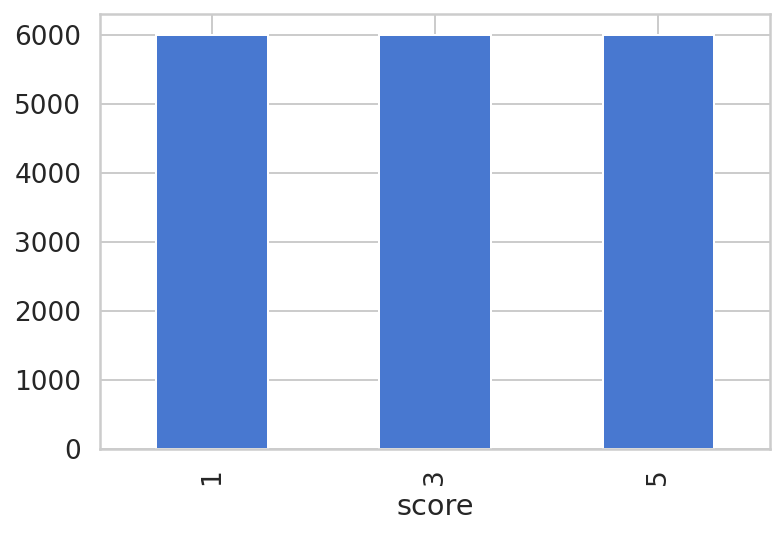

In [18]:
train_set.groupby("score").score.count().plot.bar(ylim=0)
print(train_set['score'].unique())
print(train_set['score'].nunique())
train_set['score'].value_counts()
target_category = train_set['score'].unique()
target_category=list(map(str,target_category))
print(target_category)

In [19]:
phrase = train_set['content']
phrase.head(10)



0    Since the latest update, the app has slowed to...
1    Unusable. This used to be one of my most used ...
2    This app has been performing so much worse as ...
3    Trying again since the first one didn't seem t...
4    Yeah, this is getting to be unacceptable. I ag...
5    Has recently started using huge amounts of dat...
6    I would give it a zero if I could but 1 is the...
7    i loved this app until a recent update, now i ...
8    Latest upgrade freezes phone for up to a minut...
9    Rubbish update breaks several things. Can't ty...
Name: content, dtype: object

In [20]:
sentiment = train_set["score"]
sentiment.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: score, dtype: int64

In [21]:
def preprocessDataset(text): 
        
    text = str(text)
    
    #remove single quotes 
    text = text.replace("'", "")
    
    
    #word tokenization using text-to-word-sequence
    tokenized_train_set = text_to_word_sequence(text,filters='!"#$ãº»îª¬ì¢í©ë±´ê£¼°§¶¦¾à®¸¡øù«ñ¿¥­á¯%&()âµð¤·½ï*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=" ")


    #stop word removal
    stop_words = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenized_train_set if not i in stop_words]
    #print (stop_words)
     
    #join words into sentence
    stopwordremove_text = ' '.join(stopwordremove)
    #print(stopwordremove_text)
        
    #remove numbers
    numberremove_text = ''.join(c for c in stopwordremove_text if not c.isdigit())
    #print(output)
        
    #Stemming
    stemmer= PorterStemmer()

    stem_input=nltk.word_tokenize(numberremove_text)
    stem_text=' '.join([stemmer.stem(word) for word in stem_input])
    #print(stem_text)
    
    #lemmatization
    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    lem_input = nltk.word_tokenize(stem_text)
    lem_text= ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lem_input])
    print(lem_text)
    

    return lem_text

In [22]:
train_set['content'] = train_set['content'].apply(preprocessDataset)
phrase = train_set['content']
sentiment = train_set['score']
phrase.head()


Streaming output truncated to the last 5000 lines.
love yahoo mail sever month thank havent singl problem featur awesom secur good thing id chang could would away unsolicit email plagu inbox inbox oh would great one button abl delet email one shot
awsom much simpler fast accur best app manag arrang must forward send mail entir thread visibl chronolog order prefer late repli mail receiv top mail sent topmost current thread arrang quit cumbersom confus
find yahoo email great email platform use excel yahoo mail use continu mani year platform choic send email thank excel platform
great email app simpl thee email app email platform look simpler easi understand straight forward email platform one download especi ur st email address tech savvi easi learn also teach someon like ur grandpar less comput knowledg gener lol cuz know frustrat tri teach folk 
usp come mighti long way first start love email provid make much easy check email one place thank app well do
experienc new want lose old fol

0    sinc late updat app slow complet crawl screen ...
1    unus use one use app movi trivia actor inform ...
2    app perform much wors updat come samsung note ...
3    tri sinc first one didnt seem keep unaccept am...
4    yeah get unaccept agre everyon el give one sta...
Name: content, dtype: object

In [23]:
def wordCollection(phrase, sentiment):
    words = []
    for i in phrase[phrase['score'] == sentiment]['content'].str.split():
        for j in i:
            words.append(j)
    return words

In [24]:
negative = wordCollection(train_set,1)
neutral = wordCollection(train_set,3)
positive = wordCollection(train_set,5)


In [25]:
list_data = list(zip(phrase, sentiment))
   
train_set = pd.DataFrame(list_data,columns = ['content', 'score'])
train_set.head(20)

,content,score
0,sinc late updat app slow complet crawl screen ...,1
1,unus use one use app movi trivia actor inform ...,1
2,app perform much wors updat come samsung note ...,1
3,tri sinc first one didnt seem keep unaccept am...,1
4,yeah get unaccept agre everyon el give one sta...,1
5,recent start use huge amount data obviou reaso...,1
6,would give zero could low go unus sinc last up...,1
7,love app recent updat absolut hate use go perf...,1
8,late upgrad freez phone minut ad bottom screen...,1
9,rubbish updat break sever thing cant type revi...,1


In [26]:
train_set['content'].replace('', np.nan, inplace=True)
train_set.dropna(subset = ["content"], inplace=True)
train_set.head(20)

,content,score
0,sinc late updat app slow complet crawl screen ...,1
1,unus use one use app movi trivia actor inform ...,1
2,app perform much wors updat come samsung note ...,1
3,tri sinc first one didnt seem keep unaccept am...,1
4,yeah get unaccept agre everyon el give one sta...,1
5,recent start use huge amount data obviou reaso...,1
6,would give zero could low go unus sinc last up...,1
7,love app recent updat absolut hate use go perf...,1
8,late upgrad freez phone minut ad bottom screen...,1
9,rubbish updat break sever thing cant type revi...,1


In [27]:
print(len(train_set))

17928


In [28]:
phrase = train_set['content']
sentiment = train_set['score']

phrase.head()

0    sinc late updat app slow complet crawl screen ...
1    unus use one use app movi trivia actor inform ...
2    app perform much wors updat come samsung note ...
3    tri sinc first one didnt seem keep unaccept am...
4    yeah get unaccept agre everyon el give one sta...
Name: content, dtype: object

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(phrase,sentiment, test_size = 0.45, random_state = 40,shuffle=True, stratify=sentiment)

In [30]:
print(len(X_train))
print(len(X_test))

9860
8068


In [35]:
vectorizer = TfidfVectorizer()
tfidf_text = vectorizer.fit_transform(X_train)
#print(tfidf_text)


#--Training the classifier with  Naive Bayes--

nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])

nb.fit(X_train,Y_train)

test_predict = nb.predict(X_test)

train_accuracy = round(nb.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

Naive Bayes Train Accuracy Score : 71% 
Naive Bayes Test Accuracy Score  : 57% 

              precision    recall  f1-score   support

           1       0.72      0.55      0.63      3503
           3       0.37      0.49      0.42      2052
           5       0.62      0.67      0.64      2513

    accuracy                           0.57      8068
   macro avg       0.57      0.57      0.56      8068
weighted avg       0.60      0.57      0.58      8068



In [36]:
sgd = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier()),
               ])

sgd.fit(X_train, Y_train)

test_predict = sgd.predict(X_test)

train_accuracy = round(sgd.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("SVM Train Accuracy Score : {}% ".format(train_accuracy ))
print("SVM Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

SVM Train Accuracy Score : 76% 
SVM Test Accuracy Score  : 57% 

              precision    recall  f1-score   support

           1       0.65      0.59      0.62      2975
           3       0.39      0.48      0.43      2173
           5       0.68      0.63      0.66      2920

    accuracy                           0.57      8068
   macro avg       0.57      0.57      0.57      8068
weighted avg       0.59      0.57      0.58      8068



In [ ]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(X_train, Y_train)

test_predict = dt.predict(X_test)

train_accuracy = round(dt.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

In [38]:
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=5, metric='euclidean')),
               ])

knn.fit(X_train, Y_train)

test_predict = knn.predict(X_test)

train_accuracy = round(knn.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(train_accuracy ))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(test_accuracy ))
print()

print(classification_report(test_predict, Y_test, target_names=target_category))

K-Nearest Neighbour Train Accuracy Score : 62% 
K-Nearest Neighbour Test Accuracy Score  : 42% 

              precision    recall  f1-score   support

           1       0.39      0.42      0.41      2510
           3       0.38      0.40      0.39      2544
           5       0.47      0.42      0.45      3014

    accuracy                           0.42      8068
   macro avg       0.42      0.42      0.41      8068
weighted avg       0.42      0.42      0.42      8068



In [8]:

from google.colab import files
  
  
uploaded = files.upload()

Saving reviews.csv to reviews.csv


In [9]:
import pandas as pd
import io
  
df = pd.read_csv(io.BytesIO(uploaded['reviews.csv']), encoding='latin1', )
df

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,0,gp:AOqpTOHBGi5ZIRswL1Ajsq2iEDZajOL7vWOM3QPGavQ...,Jeremy Fairbrass,https://play-lh.googleusercontent.com/a-/AOh14...,"Since the latest update, the app has slowed to...",1,320,8.4.7.108470102,9/10/2021 20:53,NaN,NaN,most_relevant,com.imdb.mobile
1,1,gp:AOqpTOF1QKSTh6Z7salFdvi2tTZoHSDdFG0wKqlCV4B...,Alexia Albert,https://play-lh.googleusercontent.com/a-/AOh14...,Unusable. This used to be one of my most used ...,1,108,8.4.7.108470102,9/18/2021 16:58,NaN,NaN,most_relevant,com.imdb.mobile
2,2,gp:AOqpTOGnds6N_xn7rYwRKIC14Lw8i3fwjLBUG-kjYrf...,Jeff Helba,https://play-lh.googleusercontent.com/a-/AOh14...,This app has been performing so much worse as ...,1,206,8.4.7.108470102,9/5/2021 13:57,NaN,NaN,most_relevant,com.imdb.mobile
3,3,gp:AOqpTOHVyjumuePYAqxrJu7Z6D8p31dxkEU2kcGoWrZ...,Thomas Lunsford,https://play-lh.googleusercontent.com/a-/AOh14...,Trying again since the first one didn't seem t...,1,101,8.4.7.108470102,9/11/2021 18:46,NaN,NaN,most_relevant,com.imdb.mobile
4,4,gp:AOqpTOGBV6gGkRX9gPRC7wRMlO3uc0mWKuo9_TaQMdj...,Kitley D,https://play-lh.googleusercontent.com/a-/AOh14...,"Yeah, this is getting to be unacceptable. I ag...",1,10,8.4.7.108470102,9/17/2021 3:18,NaN,NaN,most_relevant,com.imdb.mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17995,gp:AOqpTOGCdqjuCa-Ki6Yb-bChCGXzQgC0zjJ_wz7GDav...,Browseinbeauty BBenally01atgmail,https://play-lh.googleusercontent.com/a-/AOh14...,Good!,5,0,7.120.0 build 7 35589,9/23/2021 20:10,NaN,NaN,newest,com.netflix.mediaclient
17996,17996,gp:AOqpTOFiNyPFOwIUeJN4epBk6PJN5uPfZxAZm7L6Wil...,Lady Bernadette Salangsang,https://play-lh.googleusercontent.com/a-/AOh14...,I realy love it! The new movies.,5,0,8.0.0 build 5 40003,9/23/2021 20:01,NaN,NaN,newest,com.netflix.mediaclient
17997,17997,gp:AOqpTOHlV3lRMvc7jWsZJAOEWQYbX2y_Zh0C2Tqtf9H...,Mende Eixab,https://play-lh.googleusercontent.com/a/AATXAJ...,Now this is the best most wonderful app to wat...,5,0,NaN,9/23/2021 19:18,NaN,NaN,newest,com.netflix.mediaclient
17998,17998,gp:AOqpTOEFICHuDJsccZ2-L8FVigQxPTx2RDeg1YD-pOQ...,Bhanu Venkat,https://play-lh.googleusercontent.com/a-/AOh14...,The best I have ever seen on an ott,5,0,7.115.0 build 6 35557,9/23/2021 19:16,NaN,NaN,newest,com.netflix.mediaclient


In [10]:
df = df.drop(columns=['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt'])

In [11]:
df =df.drop(columns=['sortOrder', 'appId'])

In [12]:
df = df.drop(columns = 'Unnamed: 0')
